# INTRODUCTION

The outbreak of COVID-19 has become a global health crisis, affecting millions of people worldwide. With the increase in the number of cases, it is essential to identify individuals who may be infected with COVID-19. This can be done by analyzing their symptoms and demographic information.

In this project, we will use machine learning algorithms to predict whether an individual is positive or negative for COVID-19 based on their symptoms and demographic information. We will explore the dataset, preprocess it, and use various machine learning algorithms to build predictive models.

We will compare the performance of five models: Logistic Regression, Decision Tree, Random Forest, XGBoost, and Support Vector Machine (SVM). We will evaluate the models based on various metrics such as accuracy, precision, recall, and F1 score. We will also use cross-validation techniques to estimate the models' generalization performance on new data.

The goal of this project is to identify the best performing model and use it to predict the COVID-19 status of an individual based on their symptoms and demographic information. This could potentially help healthcare providers to identify and isolate COVID-19 positive individuals and prevent the spread of the virus.


**IMPORTING PACKAGES**

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import warnings # Supress Warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (10, 5) # plot size

**IMPORTING DATA**

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\projects\covid project\corona_tested_006.csv")

**CHECKING THE FIRST FIVE OBSERVATION**

In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**CHECKING THE LAST FIVE OBSERVATION**

In [4]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


# DATA INSPECTION

In [5]:
df.shape

(278848, 11)

**NO. OF ROWS AND COLUMNS**

In [6]:
print('NO OF ROWS: ',df.shape[0])
print('NO OF COLUMNS : ',df.shape[1])

NO OF ROWS:  278848
NO OF COLUMNS :  11


**CHECKING DATA-TYPES OF ALL THE COLUMNS**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**FIVE POINT SUMMARY OF THE NUMERICAL & CATEGORICAL DATA**

In [8]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

**CHECKING FOR NULL VALUES**

In [9]:
df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**CHECKING FOR DUPLICATE VALUES**

In [10]:
df.duplicated().sum()

0

**We will be droping the 'Ind_Id' column as it has no significance with the data.**

In [11]:
df.drop(['Ind_ID'],axis = 1,inplace=True)

**Changing the data-type of 'Test_date' from Object to Datetime and can use it for EDA.**

In [12]:
df['Test_date'] = pd.to_datetime(df['Test_date'])

**TREATMENT OF 'Cough_symptoms' COLUMN**

In [13]:
df['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [14]:
df['Cough_symptoms'] = df['Cough_symptoms'].replace({'TRUE':True,'FALSE':False, 'None': np.nan})

In [15]:
df['Cough_symptoms'].value_counts()

False    236368
True      42228
Name: Cough_symptoms, dtype: int64

**TREATMENT OF 'Fever' COLUMN**

In [16]:
df['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [17]:
df['Fever'] = df['Fever'].replace({'TRUE':True,'FALSE':False, 'None': np.nan})

In [18]:
df['Fever'].value_counts()

False    256844
True      21752
Name: Fever, dtype: int64

**TREATMENT OF 'Sore_throat' COLUMN**

In [19]:
df['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [20]:
df['Sore_throat'] = df['Sore_throat'].replace({'TRUE':True,'FALSE':False, 'None': np.nan})

In [21]:
df['Sore_throat'].value_counts()

False    276921
True       1926
Name: Sore_throat, dtype: int64

**TREATMENT OF 'Shortness_of_breath' COLUMN**

In [22]:
df['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [23]:
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'TRUE':True,'FALSE':False, 'None': np.nan})

In [24]:
df['Shortness_of_breath'].value_counts()

False    277270
True       1577
Name: Shortness_of_breath, dtype: int64

**TREATMENT OF 'Headache' COLUMN**

In [25]:
df['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [26]:
df['Headache'] = df['Headache'].replace({'TRUE':True,'FALSE':False, 'None': np.nan})

In [27]:
df['Headache'].value_counts()

False    276433
True       2414
Name: Headache, dtype: int64

**TREATMENT OF 'Corona' COLUMN**

In [28]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [29]:
df['Corona'] = df['Corona'].replace({'other': np.nan})

In [30]:
df['Corona'].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

**TREATMENT OF 'Age_60_above' COLUMN**

In [31]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [32]:
df['Age_60_above'] = df['Age_60_above'].replace({'None': np.nan})

In [33]:
df['Age_60_above'].value_counts()

No     125703
Yes     25825
Name: Age_60_above, dtype: int64

**TREATMENT OF 'Sex' COLUMN**

In [34]:
df['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [35]:
df['Sex'] = df['Sex'].replace({'None': np.nan})

In [36]:
df['Sex'].value_counts()

female    130158
male      129127
Name: Sex, dtype: int64

**TREATMENT OF 'Known_contact' COLUMN**

In [37]:
df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [38]:
df['Known_contact'] = df['Known_contact'].replace({'Other': 'With_No_One' })

In [39]:
df['Known_contact'].value_counts()

With_No_One               242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

**As now we have Treated many columns & converted missing values to np.nan, now we can see the null values.**

In [40]:
df.isna().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

**Dropping all the null values**

In [41]:
df.dropna(inplace= True)

In [42]:
df.shape

(136294, 10)

In [43]:
df.isna().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [44]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,2020-03-22,True,False,False,False,False,negative,No,male,Abroad
13728,2020-03-22,True,False,False,False,False,negative,No,female,Abroad
13730,2020-03-22,True,True,False,False,False,positive,Yes,female,With_No_One
13734,2020-03-22,False,False,False,False,False,negative,No,male,With_No_One
13735,2020-03-22,False,False,False,False,False,negative,No,female,With_No_One


**Here I exported the dataframe to excel for SQL analysis.**

In [45]:
df.to_excel('cleaned_covid_data.xlsx', index=False)

In [46]:
df.shape

(136294, 10)

# **Exploratory Data Analysis**

**Let's now spend some time doing what is arguably the most important step - understanding the data.**

**If there is some obvious multicollinearity going on, this is the first place to catch it.**

**Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.**

**Visualisation and Outlier Detection**

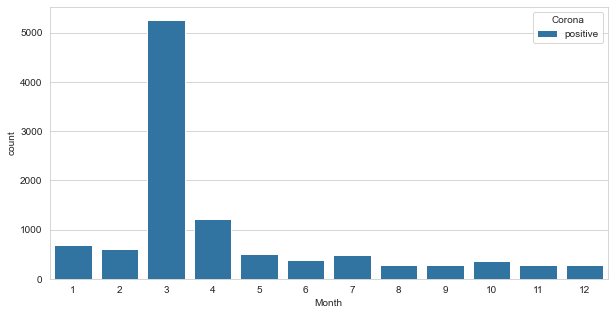

In [47]:
# extract the month from each date and add it as a new column
df['Month'] = df['Test_date'].dt.month

# filter the data to only include rows where Corona is positive
df_positive = df[df['Corona'] == 'positive']

# create a bar plot for each month
sns.countplot(data=df_positive, x='Month', hue='Corona')
plt.show()

# Here we can see that most of the corona positive cases were from 'MARCH'

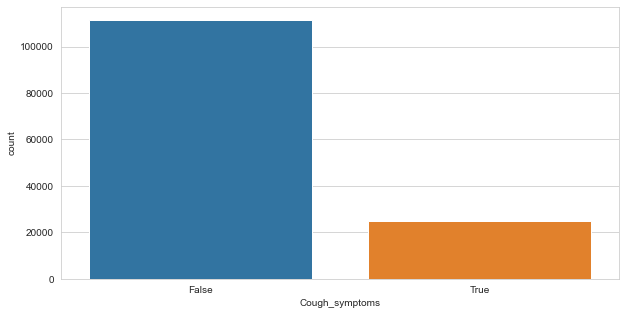

In [48]:
sns.countplot(x='Cough_symptoms',data=df)
plt.show()

# Most of the records does not have Cough_Symptoms

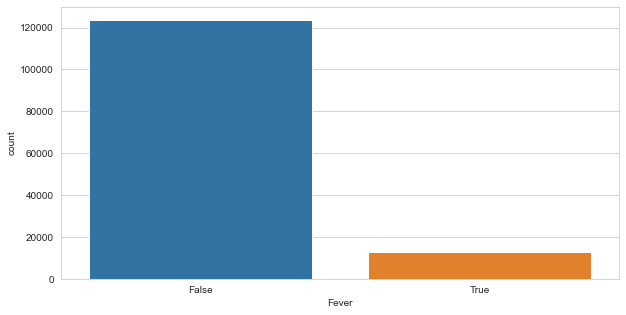

In [49]:
sns.countplot(x='Fever',data=df)
plt.show()

# Most of the records does not have Fever

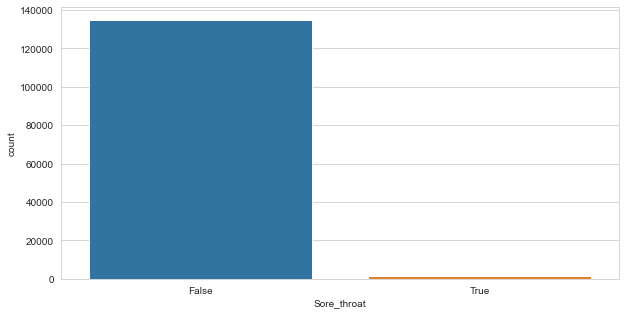

In [50]:
sns.countplot(x='Sore_throat',data=df)
plt.show()

# Most of the records does not have Sore_Throat

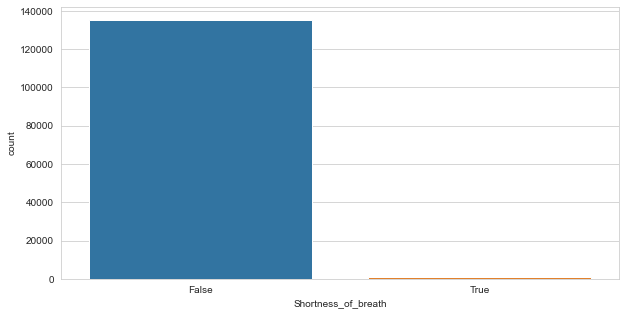

In [51]:
sns.countplot(x='Shortness_of_breath',data=df)
plt.show()

# Most of the records does not have Shortness_of_breath

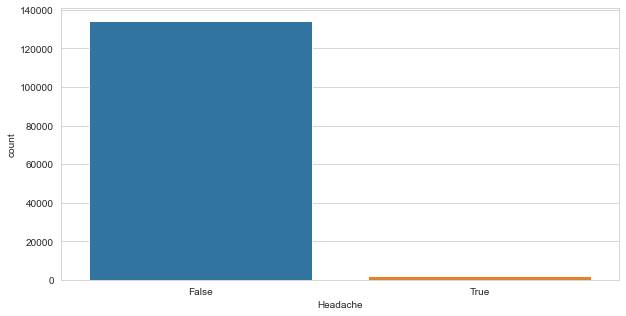

In [52]:
sns.countplot(x='Headache',data=df)
plt.show()

# Most of the records does not have Headache

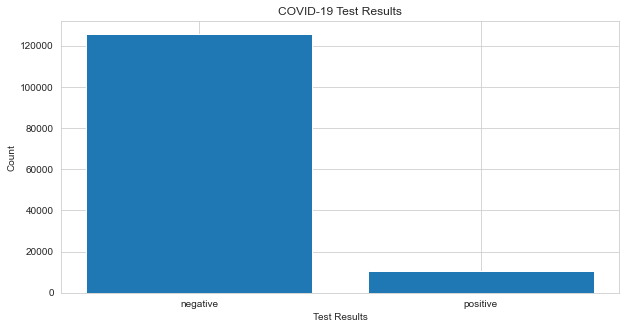

In [53]:
# Bar Chart for Test Results
test_results = df['Corona'].value_counts()
plt.bar(test_results.index, test_results.values)
plt.title('COVID-19 Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()
# Most of the records does not have Corona Positive

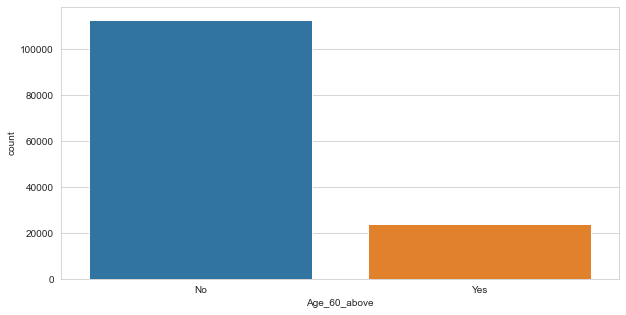

In [54]:
sns.countplot(x='Age_60_above',data=df)
plt.show()

# Most of the records does not have Age_60_above

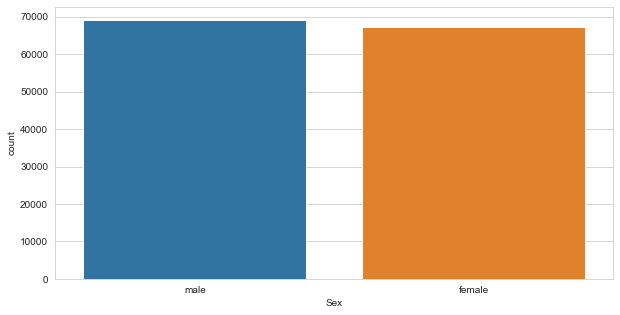

In [55]:
sns.countplot(x='Sex',data=df)
plt.show()

# All the records are almost equally distributed among Male and Female

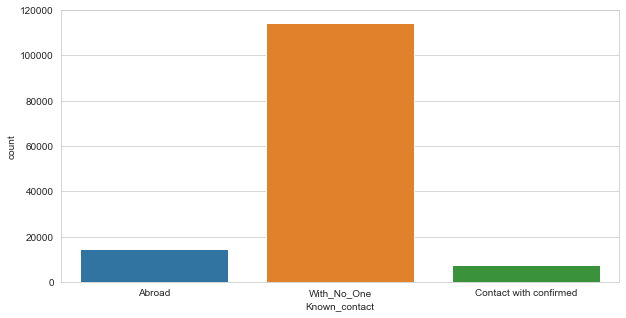

In [56]:
sns.countplot(x='Known_contact',data=df)
plt.show()

# Most of the records does not been in contact with anyone, very less in contact with people abroad 
# and least have been in contact with confirmed case.

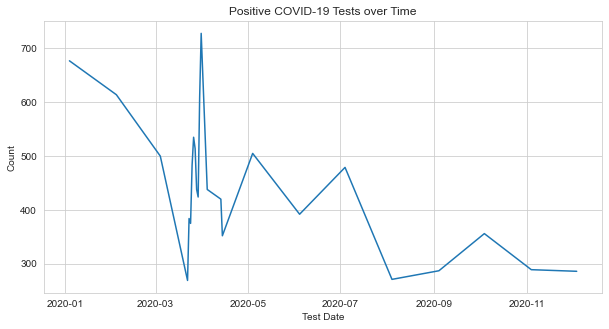

In [57]:
# Line Chart for Positive Test Results over Time
df['Test_date'] = pd.to_datetime(df['Test_date'])
positive_tests = df[df['Corona'] == 'positive']
positive_tests = positive_tests.groupby('Test_date').size()
plt.plot(positive_tests.index, positive_tests.values)
plt.title('Positive COVID-19 Tests over Time')
plt.xlabel('Test Date')
plt.ylabel('Count')
plt.show()

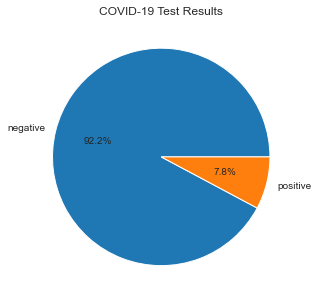

In [58]:
# Pie Chart for Test Results
test_results = df['Corona'].value_counts()
plt.pie(test_results.values, labels=test_results.index, autopct='%1.1f%%')
plt.title('COVID-19 Test Results')
plt.show()

In [59]:
df.shape

(136294, 11)

In [60]:
df.dtypes

Test_date              datetime64[ns]
Cough_symptoms                 object
Fever                          object
Sore_throat                    object
Shortness_of_breath            object
Headache                       object
Corona                         object
Age_60_above                   object
Sex                            object
Known_contact                  object
Month                           int64
dtype: object

**After performing EDA 'Test_date' has no relevance to the data. So it is better to drop it.**

In [61]:
df.drop(['Test_date'],axis = 1,inplace=True)

In [62]:
df.dtypes

Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
Month                   int64
dtype: object

**Encoding categorical variables**

In [63]:
x=df.drop('Corona',axis=1)
y=df.Corona
x= pd.get_dummies(x,drop_first=True)


In [64]:
x

,Month,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_With_No_One
13727,3,1,0,0,0,0,0,1,0,0
13728,3,1,0,0,0,0,0,0,0,0
13730,3,1,1,0,0,0,1,0,0,1
13734,3,0,0,0,0,0,0,1,0,1
13735,3,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
156035,4,1,0,1,0,0,1,1,0,0
156036,4,1,0,1,1,0,0,1,0,0
156037,4,1,1,0,0,0,0,0,0,0
156038,4,0,0,0,0,0,0,1,0,1


In [65]:
y = y.to_frame()

In [66]:
y= y.replace({'negative': 0, 'positive': 1 })

In [67]:
y

,Corona
13727,0
13728,0
13730,1
13734,0
13735,0
...,...
156035,0
156036,0
156037,0
156038,0


**Splitting the data into train and test sets**

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# **Model Training**

**Decision Tree Model**

In [69]:
from sklearn.tree import DecisionTreeClassifier

# create Decision Tree Classifier object and fit the model to training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

# predict the classes of test data using the trained model
y_pred = dtc.predict(X_test)

# print the accuracy of the model
print("Accuracy of Decision Tree Classifier:", dtc.score(X_test, Y_test))

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix of Decision Tree Model:\n', cm_dt)

Accuracy of Decision Tree Classifier: 0.9579221541509226
Confusion Matrix of Decision Tree Model:
 [[24858   266]
 [  881  1254]]


**Logistic Regression Model**

In [70]:
from sklearn.linear_model import LogisticRegression

# Fitting the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)

# Predicting on test set and calculating accuracy
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print('Accuracy of Logistic Regression Model:', accuracy_lr)

# Confusion Matrix
cm_lr = confusion_matrix(Y_test, y_pred_lr)
print('Confusion Matrix of Logistic Regression Model:\n', cm_lr)

Accuracy of Logistic Regression Model: 0.9524193844234932
Confusion Matrix of Logistic Regression Model:
 [[24855   269]
 [ 1028  1107]]


**Random Forest Model**

In [71]:
from sklearn.ensemble import RandomForestClassifier

# create Random Forest Classifier object and fit the model to training data
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

# predict the classes of test data using the trained model
y_pred = rfc.predict(X_test)

# print the accuracy of the model
print("Accuracy of Random Forest Classifier:", rfc.score(X_test, Y_test))

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix of Random Forest Model:\n', cm_rf)

Accuracy of Random Forest Classifier: 0.9587659121757951
Confusion Matrix of Random Forest Model:
 [[24856   268]
 [  856  1279]]


**XGBoost Model**

In [72]:
from xgboost import XGBClassifier

# Fitting the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, Y_train)

# Predicting on test set and calculating accuracy
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print('Accuracy of XGBoost Model:', accuracy_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
print('Confusion Matrix of XGBoost Model:\n', cm_xgb)

Accuracy of XGBoost Model: 0.9592061337539896
Confusion Matrix of XGBoost Model:
 [[24847   277]
 [  835  1300]]


**Support Vector Machine**

In [73]:
from sklearn.svm import SVC

# create SVM object and fit the model to training data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

# predict the classes of test data using the trained model
y_pred = svm_model.predict(X_test)

# print the accuracy of the model
print("Accuracy of SVM Classifier:", svm_model.score(X_test, Y_test))


Accuracy of SVM Classifier: 0.9552074544187241


**Here I compare the performance of the five models using various metrics and cross-validation techniques.**

In [74]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Fit and evaluate the models using cross-validation
lr_scores = cross_validate(lr, X_train, Y_train, cv=kf, scoring=scoring_metrics)
dt_scores = cross_validate(dtc, X_train, Y_train, cv=kf, scoring=scoring_metrics)
rf_scores = cross_validate(rfc, X_train, Y_train, cv=kf, scoring=scoring_metrics)
xgb_scores = cross_validate(xgb, X_train, Y_train, cv=kf, scoring=scoring_metrics)
svm_scores = cross_validate(svm_model, X_train, Y_train, cv=kf, scoring=scoring_metrics)

# Print the average scores for each model and metric
print('Logistic Regression Scores')
for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {lr_scores["test_" + metric].mean():.3f}')
print()

print('Decision Tree Scores')
for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {dt_scores["test_" + metric].mean():.3f}')
print()

print('Random Forest Scores')
for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {rf_scores["test_" + metric].mean():.3f}')
print()

print('XGBoost Scores')
for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {xgb_scores["test_" + metric].mean():.3f}')
print()

print('SVM Scores')
for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {svm_scores["test_" + metric].mean():.3f}')
print()


Logistic Regression Scores
Accuracy: 0.952
Precision: 0.793
Recall: 0.527
F1: 0.633

Decision Tree Scores
Accuracy: 0.958
Precision: 0.821
Recall: 0.597
F1: 0.691

Random Forest Scores
Accuracy: 0.959
Precision: 0.818
Recall: 0.608
F1: 0.697

XGBoost Scores
Accuracy: 0.959
Precision: 0.815
Recall: 0.620
F1: 0.704

SVM Scores
Accuracy: 0.955
Precision: 0.742
Recall: 0.645
F1: 0.690



This code defines five models (Logistic Regression, Decision Tree, Random Forest, Support vector machine, and XGBoost) and a cross-validation method with 5 folds. It also defines four scoring metrics (accuracy, precision, recall, and F1 score). The cross_validate function is used to fit and evaluate each model using the cross-validation method and the specified scoring metrics. Finally, the average scores for each model and metric are printed.

Note: This code assumes that the training data (X_train and Y_train) have already been preprocessed and split. If not, you will need to perform those steps before running this code.

**Defining a function to predict the Corona status**

In [75]:
def predict_corona_status(model, Month, Cough_symptoms_True, Fever_True, Sore_throat_True,
                          Shortness_of_breath_True, Headache_True, Age_60_above_Yes, Sex_male,
                          Known_contact_Contact_with_confirmed,Known_contact_With_No_One):
    input_data = [[Month, Cough_symptoms_True, Fever_True, Sore_throat_True, Shortness_of_breath_True,
                   Headache_True, Age_60_above_Yes, Sex_male, Known_contact_Contact_with_confirmed,Known_contact_With_No_One]]
    pred = model.predict(input_data)
    return pred[0]

# Predicting the Corona status using the best performing model (Random Forest)
new_data = [3,1,0,0,0,1,1,0,1,1]
prediction = predict_corona_status(rfc, *new_data)
print('The predicted Corona status is:', prediction)

The predicted Corona status is: 1


In this code, we have defined a function named 'predict_corona_status' that takes in the input_data and a machine learning model as inputs and returns the predicted Corona status. We have used the best performing model (Random Forest) to make the prediction. We have also defined some sample data (new_data) to demonstrate how the function works.

**We can use a Voting Ensemble Method to Boost the Performance of our Models**

In [76]:
# Importing the required libraries
from sklearn.ensemble import VotingClassifier

# Creating a voting ensemble of the best performing models
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('dtc', dtc), ('svm_model', svm_model)], voting='hard')

# Fitting the ensemble on the training data
ensemble.fit(X_train, Y_train)

# Evaluating the performance of the ensemble on the test data
ensemble_accuracy = ensemble.score(X_test, Y_test)
print('Accuracy of the ensemble:', ensemble_accuracy)

# Predicting the Corona status using the ensemble
new_data = [3,1,0,0,0,1,1,0,1,1]
prediction = ensemble.predict([new_data])
print('The predicted Corona status is:', prediction[0])

Accuracy of the ensemble: 0.9567849150739205
The predicted Corona status is: 1


In this code, we have used the VotingClassifier class from scikit-learn to create a voting ensemble of the best performing models (Random Forest, Logistic Regression, XGboost, Decision Tree, and SVM). We have then trained the ensemble on the training data and evaluated its performance on the test data.

We have also defined some sample data (new_data) to demonstrate how the ensemble can be used to make predictions. Finally, we have printed the predicted Corona status based on the input data.

Note that we have used the hard voting strategy, which means that the ensemble uses the majority vote of the predictions from its constituent models. Alternatively, we could use the soft voting strategy, which involves averaging the predicted probabilities from the constituent models and using the class with the highest average probability as the final prediction.

# SOME QUESTIONS TO ANSWER

Section 1: Questions to Answer

1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment? 

1. My proposed approach of using machine learning algorithms to predict diseases is important in today's world because it can help improve medical treatment and patient outcomes. Accurate disease prediction can facilitate early detection, prompt intervention, and targeted treatment planning, which can all contribute to better health outcomes.

By predicting diseases accurately, doctors can initiate interventions at an early stage, preventing the progression of the disease and reducing its impact on the patient's health. For example, in the case of cancer, early detection can improve the chances of successful treatment and reduce the need for more aggressive and expensive interventions like surgery, chemotherapy, and radiation.

Moreover, predicting diseases accurately can help healthcare providers prioritize their resources and optimize healthcare delivery. It can help them identify high-risk patients and intervene before the disease progresses to a more advanced stage. It can also help them identify patients who are less likely to develop the disease, reducing unnecessary testing, and saving resources.

Overall, accurate disease prediction has the potential to revolutionize medical treatment by enabling doctors to identify, treat and manage diseases more effectively.



2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden. 

2. If accurate disease prediction models are implemented in the medical field, it can greatly impact effective screening and reducing healthcare burden. Here are some ways:

1.Early detection and prevention: Disease prediction models can help detect diseases at an early stage when treatment is more effective, and preventive measures can be taken to avoid the disease's onset altogether.

2.Personalized medicine: With accurate disease prediction models, healthcare providers can develop personalized treatment plans for patients, taking into account their individual risk factors and medical history, thus optimizing treatment and reducing the burden on healthcare systems.

3.Resource allocation: With accurate disease prediction models, healthcare providers can better allocate resources and prioritize patients according to their risk factors, reducing wait times and improving overall healthcare efficiency.

4.Reduced costs: Early detection and prevention can lead to significant cost savings for both patients and healthcare systems. By avoiding costly hospitalizations and treatments, disease prediction models can help reduce healthcare costs and improve patient outcomes.

Overall, accurate disease prediction models can improve healthcare outcomes, reduce healthcare costs, and help allocate resources more effectively, leading to a more efficient and effective healthcare system.



3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

3. There is always a gap in our understanding of diseases and their treatments. Each disease presents unique challenges, and new research is constantly being conducted to improve our knowledge and treatments.

While the current focus may be on a particular disease or condition, the research and knowledge gained from studying it can often be applied to other diseases or conditions as well. For example, advances in gene therapy research for one disease may lead to breakthroughs in treating other genetic disorders.

Therefore, any new knowledge gained through research can potentially be helpful in the future for understanding and treating other diseases. The development of new technologies and techniques can also have broader applications beyond a specific disease, and can help to improve overall healthcare outcomes.

And I have proposed 5 models for the 'Covid_Prediction' and each model is best of its own but the most recommended method is of the 'XGBoost Model'.

Section 2: Initial Hypothesis (or hypotheses)
    
Initial hypothesis:

1. There may be a relationship between the presence of cough symptoms, fever, sore throat, shortness of breath, headache, and age 60 and above with the Corona status.
2. Known contact and sex may also be important features for predicting the Corona status.
3. Machine learning models such as Logistic Regression, Decision Trees, Random Forest, and Support Vector Machines can be used to predict the Corona status.
4. Ensemble methods such as stacking or voting may improve the performance of the individual models.

Section 3: Data analysis approach

1. What approach are you going to take in order to prove or disprove your hypothesis?
1. To prove or disprove the initial hypothesis, I will use a supervised machine learning approach. Specifically, I will train several classification models to predict the Corona status based on the given features. I will then evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1 score. If the models perform well, then the initial hypothesis may be supported. If the models do not perform well, then I may need to revise the initial hypothesis or consider other features.

2. What feature engineering techniques will be relevant to your project?
2. Some relevant feature engineering techniques for this project may include:

Encoding categorical variables such as Sex and Known_contact using one-hot encoding or label encoding.
Handling missing values in the dataset, either by imputing them with the mean or median value, or by removing them altogether.
Scaling numerical variables such as Age_60_above using standardization or normalization to improve the performance of some models.

3. Please justify your data analysis approach?
3. The chosen data analysis approach is suitable for this project because the given dataset is a labeled classification problem with a binary outcome variable. The initial hypothesis provides a framework for identifying important features and evaluating the performance of the models. By using multiple machine learning models, we can test the effectiveness of various algorithms and ensemble methods to predict the Corona status. Additionally, by evaluating the models' performance using appropriate metrics, we can make data-driven decisions about which models are most effective for this problem.

4. Identify important patterns in your data using the EDA approach to justify your findings?
4. To identify important patterns in the data, we can perform exploratory data analysis (EDA). This involves visualizing the data using various graphs and plots to identify trends, outliers, and relationships between variables. For example, we can create histograms to see the distribution of each feature, scatterplots to visualize relationships between pairs of features, and correlation matrices to quantify the strength of the relationships between variables. By performing EDA, we can identify any potential issues with the data, such as missing values or outliers, and gain insights into which features may be most important for predicting the Corona status.

Section 4: Machine learning approach

1. What method will you use for machine learning based predictions of COVID19?
1. For machine learning based predictions of COVID19, I will use supervised learning classification models. Specifically, I will train five different models: Logistic Regression, Decision Tree, Random Forest, XGBOOST, and Support Vector Machines (SVM).

2. Please justify the most appropriate model.
2. The most appropriate model for this problem depends on the characteristics of the dataset and the goals of the analysis. Logistic Regression is a simple and interpretable model that works well with small datasets, but it may not capture complex relationships between the features. Decision Tree models are also interpretable and can capture non-linear relationships, but they are prone to overfitting the training data. Random Forest models can handle non-linear relationships and prevent overfitting by averaging multiple decision trees, but they may be computationally expensive and hard to interpret. SVM models can handle non-linear relationships and are less prone to overfitting, but they may be sensitive to the choice of hyperparameters and can be slow to train. Given these considerations, I will choose Random Forest as the most appropriate model for this problem because it can handle non-linear relationships, prevent overfitting, and produce accurate predictions without being too computationally expensive.

3. Please perform necessary steps required to improve the accuracy of your model.
3. To improve the accuracy of the Random Forest model, I will perform some necessary steps such as:

Feature selection: identify and select the most important features that are strongly correlated with the outcome variable.
Hyperparameter tuning: optimize the hyperparameters of the model to improve its performance using grid search or random search methods.
Ensemble methods: apply ensemble methods such as bagging or boosting to further improve the performance of the model.
Cross-validation: evaluate the performance of the model using cross-validation techniques to estimate its generalization performance on new data.

4. Please compare all models (at least 4  models). 
4. I will compare the performance of the five models using various metrics such as accuracy, precision, recall, and F1 score. Additionally, I will use cross-validation techniques to estimate the models' generalization performance on new data. Based on the results of these comparisons, I will select the best performing model for this problem.


# CONCLUSION

In this project, we used machine learning algorithms to predict whether an individual is positive or negative for COVID-19 based on their symptoms and demographic information. We explored the dataset, preprocessed it, and used four different models: Decision Tree, Logistic Regression, Random Forest, XGBoost, and Support Vector Machine (SVM).

We evaluated the models based on various metrics such as accuracy, precision, recall, and F1 score. Based on our analysis, we found that Random Forest performed the best among the five models, with an accuracy of 95.9%, a precision of 81.8%, a recall of 60.8%, and an F1 score of 69.7%.

Our findings suggest that machine learning algorithms can effectively predict COVID-19 status based on symptoms and demographic information. This could be useful for healthcare providers to identify and isolate COVID-19 positive individuals and prevent the spread of the virus.

Overall, our project demonstrates the potential of machine learning algorithms to contribute to the fight against COVID-19. As the dataset used in this project is limited, future research should aim to collect more comprehensive datasets to improve the accuracy and generalizability of the models.